<a href="https://colab.research.google.com/github/HssngH/ToBigs18/blob/main/%EC%8B%9C%EA%B3%84%EC%97%B4%EB%B6%84%EC%84%9D_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 18기 Time Series 정규세션 과제

### Electric_Production.csv 데이터를 활용하여 자유롭게 시계열분석을 진행해주세요.
첨부한 '시계열자료_실습.ipynb' 코드를 참고하셔도 좋습니다.
데이터셋 출처 :  https://www.kaggle.com/datasets/shenba/time-series-datasets

### Box-Jenkins 방법론
대략적 흐름 예시를 확인하고 싶다면 첨부한 '시계열자료_참고자료.pdf'를 읽어주세요.

### Prophet
튜토리얼 : https://hyperconnect.github.io/2020/03/09/prophet-package.html

## 라이브러리 불러오기

In [24]:
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
import matplotlib.pyplot as plt

## 데이터 불러오기

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
df = pd.read_csv('./drive/MyDrive/Colab Notebooks/ToBigs/week5_time series&svm/Electric_Production.csv')
df.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DATE        397 non-null    object 
 1   IPG2211A2N  397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


In [46]:
df.DATE = pd.to_datetime(df.DATE)

In [47]:
# prophet 패키지 사용하기 위해서 칼럼 이름 바꿔주기
df = df.rename(columns={'DATE' : 'ds', 'IPG2211A2N': 'y'})

In [48]:
df.head()

,ds,y
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151


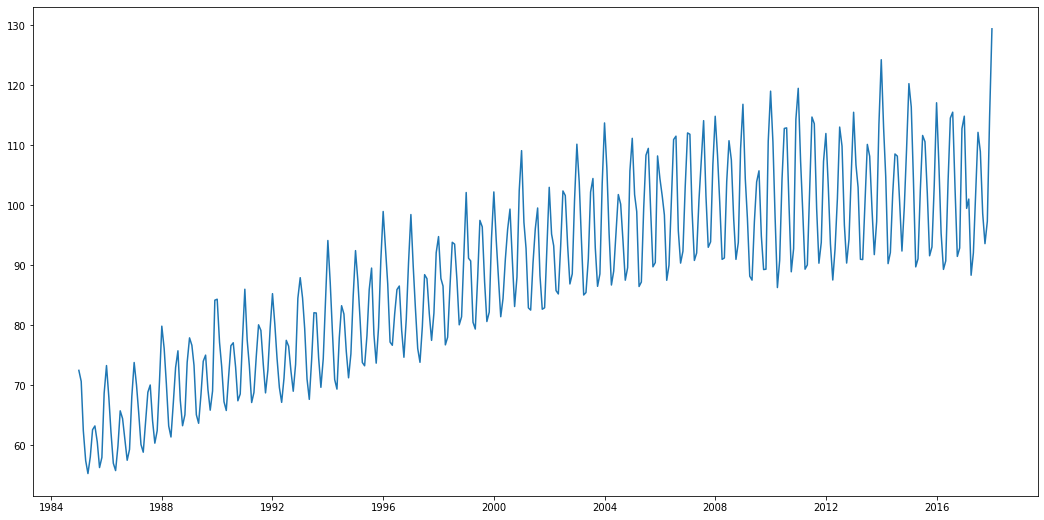

In [49]:
plt.figure(figsize=(18,9))
plt.plot(df.ds, df["y"], linestyle="-")
plt.xlabel=('Dates')
plt.ylabel=('Electric_Production')
plt.show()

In [52]:
# prophet 패키지 사용
from prophet import Prophet 

m = Prophet()
m.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp816kh77a/a9i5f69i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp816kh77a/0cxmr84j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83415', 'data', 'file=/tmp/tmp816kh77a/a9i5f69i.json', 'init=/tmp/tmp816kh77a/0cxmr84j.json', 'output', 'file=/tmp/tmpft42ww0t/prophet_model-20220823054154.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:41:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:41:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [64]:
# periods = 365 -> 향후 365일을 예측
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

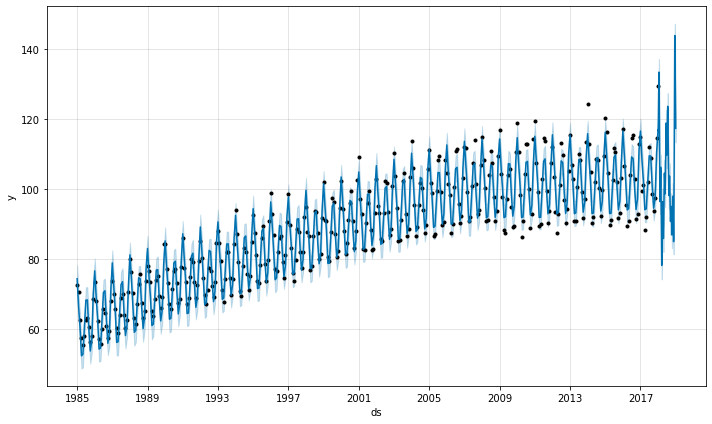

In [65]:
fig1 = m.plot(forecast)
# 파란색 선이 모델이 예측한 값
# 검정 점이 실제 값
# 파라미터 설정 전, 실제값 따라가고 있음

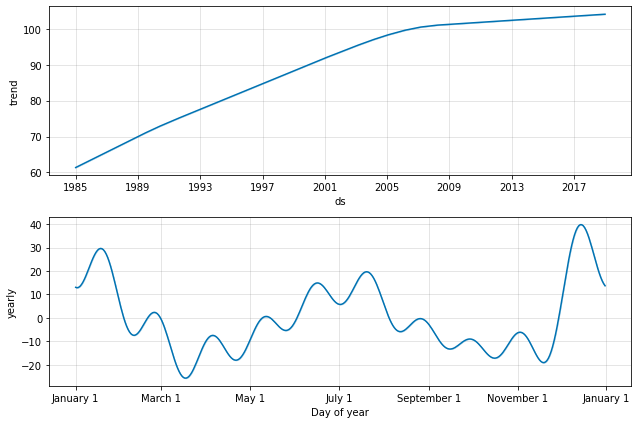

In [66]:
fig2 = m.plot_components(forecast)
# 트렌드는 점점 증가하다가 유지되는 추세
# yearly 패턴으로는 1, 7월이 증가하는 추세
## 1, 7월에 에어컨과 난방으로 인해 소비량이 증가하며, 전기생산량도 증가하는 것으로 해석할 수 있음 

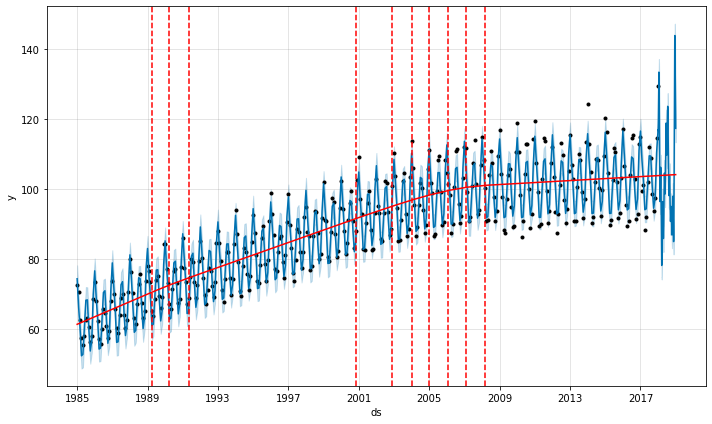

In [67]:
from prophet.plot import add_changepoints_to_plot

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)
# 빨간 실선은 트렌드를 의미하며, 빨간 점선은 트렌드가 변화하는 changepoint를 의미함

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp816kh77a/jdr3n0dk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp816kh77a/t40k10oe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89631', 'data', 'file=/tmp/tmp816kh77a/jdr3n0dk.json', 'init=/tmp/tmp816kh77a/t40k10oe.json', 'output', 'file=/tmp/tmpbg30brya/prophet_model-20220823055523.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:55:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:55:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


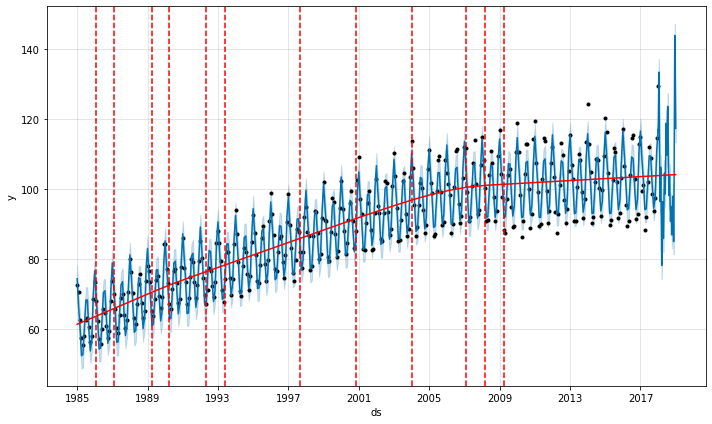

In [68]:
# changepoint_prior_scale = 0.05 (default)
# changepoint_prior_scale 파라미터 값 변경해서 실행
m = Prophet(changepoint_prior_scale=0.3)
m.fit(df)

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

# 트렌드 더 유연하게 잡아줌
## 하지만 과적합 주의해야 함